# Grupo 5 - Dados E-commerce Olist

# Verificação dos Datasets

## Produtos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
products_df = pd.read_csv('Olist/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
#Identificando os nomes das colunas:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [4]:
#Verificando o tamanho do dataframe:OK!
products_df.shape

(32951, 9)

In [5]:
#Verificando se os dados estão de acordo: OK!
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
#Dados faltantes: (só 1% dos dados estão faltando, pode apagar)
products_df.isnull().sum(axis=0)/products_df.shape[0]

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

## Review de Compras

In [7]:
review_df = pd.read_csv('Olist/olist_order_reviews_dataset.csv')
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
#Identificando os nomes das colunas:
review_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [9]:
#Verificando o tamanho do dataframe:OK!
review_df.shape

(100000, 7)

In [10]:
#Verificando se os dados estão de acordo: OK!
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [11]:
#Dados faltantes: (OK o título estar vazio, mas os comentários são um dos nossos principais parâmetros. Teremos que excluir estes nulls.PS: Score não tem NULL)
review_df.isnull().sum(axis=0)/products_df.shape[0]

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       2.679281
review_comment_message     1.767685
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

In [12]:
#Clientes que não comentaram:
review_df.review_comment_message.isnull().sum(axis=0)

58247

In [13]:
clientes_comentaram = review_df.loc[~review_df.review_comment_message.isnull()]
clientes_comentaram.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


In [14]:
#Confirmando se excluí todo os comentários vazios? Sim!
clientes_comentaram.isnull().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       31767
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [15]:
#o tamanho é significativo? Sim!
clientes_comentaram.shape

(41753, 7)

In [16]:
#Score dos clientes que comentaram em %:
clientes_comentaram.review_score.value_counts()/clientes_comentaram.shape[0]*100

5    49.447944
1    21.984049
4    14.451656
3     8.777812
2     5.338539
Name: review_score, dtype: float64

In [17]:
#Quantidade de Scores.
nota = pd.DataFrame(clientes_comentaram['review_score'].value_counts())
nota.head()

,review_score
5,20646
1,9179
4,6034
3,3665
2,2229


<ipython-input-18-47494e6a1e2c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticks(), size = 14, color = 'red');


<Figure size 864x360 with 0 Axes>

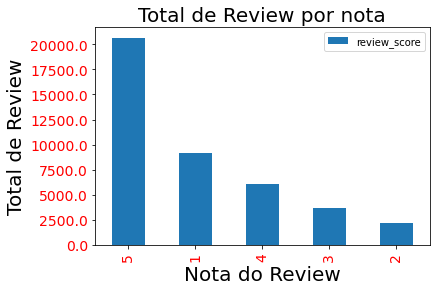

In [18]:
plt.figure(figsize=(12,5));
chart = nota.plot(kind='bar')
chart.set_xlabel("Nota do Review", fontsize=20);
chart.set_ylabel("Total de Review", fontsize=20);
chart.set_title("Total de Review por nota", fontsize=20);
chart.set_xticklabels(chart.get_xticklabels(), size = 14, color = 'red');
chart.set_yticklabels(chart.get_yticks(), size = 14, color = 'red');

## Pedidos

In [19]:
orders_df = pd.read_csv('Olist/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
#Identificando os nomes das colunas:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [21]:
#Verificando o tamanho do dataframe:OK!
orders_df.shape

(99441, 8)

In [22]:
#Verificando se os dados estão de acordo: OK!
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
#Alteração do tipo para datatime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [25]:
#Dados faltantes: (2% de NaNs, os dados podem ser excluídos)
orders_df.isnull().sum(axis=0)/orders_df.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [26]:
#Pedidos sem datas foram retirados
orders_clear = orders_df.loc[(~orders_df.order_approved_at.isnull()) & 
                             (~orders_df.order_delivered_carrier_date.isnull()) &
                             (~orders_df.order_delivered_customer_date.isnull())]
orders_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [27]:
#Vericando se existe customer_id duplicado
orders_df['customer_id'].is_unique

True

In [28]:
#Vericando se existe customer_id duplicado
duplicate_cid = orders_df[orders_df.duplicated()]
duplicate_cid.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## Dados do consumidor

In [29]:
customers_df = pd.read_csv('Olist/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
#Identificando os nomes das colunas:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [31]:
#Verificando o tamanho do dataframe:OK!
customers_df.shape

(99441, 5)

In [32]:
#Verificando se os dados estão de acordo: OK!
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [33]:
#Dados faltantes: 
customers_df.isnull().sum(axis=0)/customers_df.shape[0]

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [34]:
#Verificando se o "customers_unique_id" duplicados
duplicado = customers_df[customers_df.customer_unique_id.duplicated()]
duplicado.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP


In [35]:
#Verificando a quantidade de duplicador no "customers_unique_id"
duplicado.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     8
6469f99c1f9dfae7733b25662e7f1782     6
1b6c7548a2a1f9037c1fd3ddfed95f33     6
ca77025e7201e3b30c44b472ff346268     6
                                    ..
ee4a5dab94b427525ea24bc30d4442fb     1
a69d31a5f6011df99d415808d6d640b9     1
1d627d8a6e1e33ea8eeeb7a17d998660     1
744fb2d41ededa16d3f703b7065b234c     1
75a398e43d9757a4f7d6f622aeb22c47     1
Name: customer_unique_id, Length: 2997, dtype: int64

# Análise dos dados

## Tempo de entrega

In [36]:
#Separando data e hora
orders_clear['order_approved_at_new_date'] = [d.date() for d in orders_clear['order_approved_at']]
orders_clear['order_approved_at_new_time'] = [d.time() for d in orders_clear['order_approved_at']]
orders_clear['order_delivered_customer_new_date'] = [d.date() for d in orders_clear['order_delivered_customer_date']]
orders_clear['order_delivered_customer_new_time'] = [d.time() for d in orders_clear['order_delivered_customer_date']]
orders_clear.head()

<ipython-input-36-c7af0be2c7c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clear['order_approved_at_new_date'] = [d.date() for d in orders_clear['order_approved_at']]
<ipython-input-36-c7af0be2c7c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clear['order_approved_at_new_time'] = [d.time() for d in orders_clear['order_approved_at']]
<ipython-input-36-c7af0be2c7c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_new_date,order_approved_at_new_time,order_delivered_customer_new_date,order_delivered_customer_new_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,11:07:15,2017-10-10,21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-26,03:24:27,2018-08-07,15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,08:55:23,2018-08-17,18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,19:45:59,2017-12-02,00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,22:20:29,2018-02-16,18:17:02


In [37]:
orders_clear['Tempo_entrega'] = orders_clear['order_delivered_customer_new_date'] - orders_clear['order_approved_at_new_date']
orders_clear.head()

<ipython-input-37-7346dc6678e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clear['Tempo_entrega'] = orders_clear['order_delivered_customer_new_date'] - orders_clear['order_approved_at_new_date']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_new_date,order_approved_at_new_time,order_delivered_customer_new_date,order_delivered_customer_new_time,Tempo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,11:07:15,2017-10-10,21:25:13,8 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-26,03:24:27,2018-08-07,15:27:45,12 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,08:55:23,2018-08-17,18:06:29,9 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,19:45:59,2017-12-02,00:28:42,14 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,22:20:29,2018-02-16,18:17:02,3 days


In [38]:
orders_clear['Tempo_entrega'].value_counts()

7 days      7708
6 days      7367
8 days      6722
9 days      6074
5 days      5664
            ... 
117 days       1
173 days       1
132 days       1
186 days       1
124 days       1
Name: Tempo_entrega, Length: 147, dtype: int64

In [39]:
# Média do tempo de entrega
orders_clear['Tempo_entrega'].mean()

Timedelta('11 days 23:36:58.832481521')

## Criação de um DF consolidado

- A coluna "customer_unique_id" possui valores duplicados, dessa forma, é possivel entender que o cliente fez mais que 1 pedido
- A partir dos "customer_unique_id" foi possivel determinar os "order_id" de cada cliente e criar um DF consolidado com order_id, colunas do customer id, coluna de Reviews, Datas.

In [40]:
# Criação de uma lista dos customer_unique_id que compraram mais de 1 vez
lista_customer = duplicado.customer_unique_id.tolist()
len(lista_customer)

3345

In [41]:
# Criação de uma lista do customer id baseado na lista do 
# customer_unique_id que compraram mais de uma vez
df = customers_df.loc[(customers_df.customer_unique_id.isin(lista_customer))]
df.shape

(6342, 5)

In [42]:
#Através do "customers_unique_id" foi possível encontrar os ids do customers, que diferem para cada pedido
df_ct = df.loc[:,('customer_unique_id', 'customer_id', 'customer_city')].sort_values('customer_unique_id', ascending = False)
df_ct.head()

,customer_unique_id,customer_id,customer_city
12133,ffe254cc039740e17dd15a5305035928,0088395699ea0fcd459bfbef084997db,extrema
64323,ffe254cc039740e17dd15a5305035928,4b231c90751c27521f7ee27ed2dc3b8f,extrema
75057,ff922bdd6bafcdf99cb90d7f39cea5b3,1ae563fdfa500d150be6578066d83998,barra bonita
27992,ff922bdd6bafcdf99cb90d7f39cea5b3,bec0bf00ac5bee64ce8ef5283051a70c,barra bonita
79859,ff922bdd6bafcdf99cb90d7f39cea5b3,d064be88116eb8b958727aec4cf56a59,barra bonita


In [43]:
# Criação de uma lista dos customer_id
lista_customer_id = df.customer_id.tolist()
lista_customer_id

['879864dab9bc3047522c92c82e1212b8',
 '5adf08e34b2e993982a47070956c5c65',
 'eabebad39a88bb6f5b52376faec28612',
 '2d5831cb2dff7cdefba62e950ae3dc7b',
 'b2bed119388167a954382cca36c4777f',
 'a3b0fda37bae14cf754877bed475e80c',
 '3f6ede29d4c69cd3316d2035b6cec1fb',
 '8891eb5ca0e28df961b2b5b8f3c0eb23',
 'fe6d73ac006153a398439253006e5adc',
 'f7c5afab273b47ab517e096e0219b932',
 'acca74d2a60c03b46a5256c02cef9244',
 'cb96e80748675729d4d3857321cacb26',
 '46c6a82294d359a290ff408b11cbb643',
 'eee74b2a9aa0989243d2793c1a90fbf6',
 '852947b57caab58c544343592f5e06d2',
 'ce330ffe33e3f344ad5a80b8410c1ced',
 '4b003ee1eabaffe8ff8e6d75394a9b42',
 'd3ab15f0bd2c58865d566ab645572cd5',
 '4c9c41a8c1965305e2e1978666bd6d09',
 'a187d29dfe942335287dc88897ed265c',
 '872a25f014b99c4c17341cd9ad0d468f',
 'e22da2634721c7cb676fc0a5da6317f3',
 '800282b8afaaf9ed8bb6ed9adcf83e61',
 '3db09129454f368874d3f18bb83c7d64',
 '038d3dd1371d364b6ae8ece9febc397b',
 '5eef8c5a24bd948fac341c6ebe3ce41e',
 '178706e9cab0f7d13bb90fbf946269c5',
 

In [44]:
# Pedidos que foram feitos baseado na lista_customer_id
order_1 = orders_df.loc[orders_df.customer_id.isin(lista_customer_id)]
order_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12


In [45]:
order_1.shape

(6342, 8)

In [46]:
#Merge DF dos pedidos e DF dos "customer_id"
order_1.merge(df_ct)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,ccafc1c3f270410521c3c6f3b249870f,goiania
2,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro
3,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,jundiai
4,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12,c2551ea089b7ebbc67a2ea8757152514,cruz das almas
...,...,...,...,...,...,...,...,...,...,...
6337,58edf3f5f282ab91e0f6a6f2b85af02a,14945bc802d49b0f9f68f2ea8fd060c4,delivered,2018-05-07 09:01:58,2018-05-08 04:34:10,2018-05-10 12:35:00,2018-05-14 18:52:56,2018-05-30,62b8761192c86f4ead06f4a433096a2b,navegantes
6338,bfecb4ee6ab98bff69307aab578db48a,e6f5f771cdbc5d09c994f16c9af6523d,delivered,2018-03-17 12:52:37,2018-03-17 13:10:35,2018-03-20 17:47:33,2018-03-27 19:16:57,2018-04-12,dca9a13536adcef18c6c5859487347b1,sao paulo
6339,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,d05c44a138277ad325d915c6b7ccbcdf,sao paulo
6340,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24,39fff7cb5873a7116b02234bd1e6c6dc,sao vicente


In [47]:
# Criação de uma lista do order_id
lista_order = order_1.order_id.tolist()

In [52]:
# Verificação se o cliente que comprou mais de uma vez fez algum review
df2 = review_df.loc[(review_df.order_id.isin(lista_order))]
df2.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5,NaN,relógio muito bonito e barato.,2018-03-29 00:00:00,2018-04-02 14:19:31
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 19:12:30
50,c41bd21983e298a240410ebb391bf075,9562b424b05978a493db2a5122ecab1f,5,NaN,Tomara q dure pois é de pelinho.,2017-05-19 00:00:00,2017-05-21 03:04:35
55,3d94fd645cdaacc8c9f0dc0a2a1f5166,4d483bf690ca21bdc005df9b623673c7,5,NaN,boa,2017-03-21 00:00:00,2017-03-22 00:58:49
79,c45811d9f90e22a81155b3a1e4a5c2e8,491f193fc52075598871cfe6f19976d4,5,RECOMENDO SEMPRE!!,O kit mochila patrulha canina é lindo!! Meu ne...,2018-06-19 00:00:00,2018-06-19 17:44:05


In [53]:
df4 = order_1.merge(df_ct).merge(df2).sort_values('customer_unique_id', ascending = False)
df4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4677,ebe76afae9242fc70b0b807b78f17adb,0088395699ea0fcd459bfbef084997db,delivered,2017-04-02 16:33:30,2017-04-02 16:42:25,2017-04-10 10:14:32,2017-04-20 09:33:20,2017-05-11,ffe254cc039740e17dd15a5305035928,extrema,17e2733714dbd8fbb820ed98f83f1b95,5,NaN,baratheon e uma das melhores lojas.,2017-04-20 00:00:00,2017-04-20 21:27:05
2242,39a0e2f723def2e12a51e963006c9242,4b231c90751c27521f7ee27ed2dc3b8f,delivered,2017-04-02 16:33:30,2017-04-02 16:42:23,2017-04-06 10:38:35,2017-04-19 16:13:08,2017-04-28,ffe254cc039740e17dd15a5305035928,extrema,651821f96613bafd60f6c70ca66ef495,1,NaN,Meu produto não certo. Insatisfeita\r\n,2017-04-21 00:00:00,2017-04-21 21:06:41
5008,fd216c435fda2be27c92920a5e5dba82,1ae563fdfa500d150be6578066d83998,delivered,2017-02-22 12:26:42,2017-02-22 13:05:25,2017-02-23 13:26:17,2017-03-08 02:02:59,2017-03-23,ff922bdd6bafcdf99cb90d7f39cea5b3,barra bonita,2a4ffebf1db8784ce95a9e64007cd593,5,NaN,NaN,2017-03-09 00:00:00,2017-03-09 15:27:47
2176,6be1646fccbb69d34b22da3b1807d51d,bec0bf00ac5bee64ce8ef5283051a70c,delivered,2017-09-14 14:24:04,2017-09-14 14:39:31,2017-09-14 20:43:36,2017-09-18 20:47:54,2017-10-02,ff922bdd6bafcdf99cb90d7f39cea5b3,barra bonita,462684e14dee3e57d18b2286be6b6437,5,NaN,Melhor do que imaginei... Grande e com um desi...,2017-09-19 00:00:00,2017-09-22 01:35:36
2413,5f79e2da24a52e76bc22897df03a7901,d064be88116eb8b958727aec4cf56a59,delivered,2017-08-23 13:15:29,2017-08-23 13:30:19,2017-09-22 13:45:55,2017-09-25 21:34:47,2017-09-21,ff922bdd6bafcdf99cb90d7f39cea5b3,barra bonita,154b7a842f75518b6dd2672c80f8f69e,3,NaN,NaN,2017-09-23 00:00:00,2017-09-24 15:28:07


In [54]:
# DF consolidado com 'order_id','customer_unique_id','customer_id', colunas de datas e  colunas de review
df4 = df4[['order_id','customer_unique_id','customer_id','order_status', 'order_purchase_timestamp',\
           'order_approved_at','order_delivered_carrier_date','customer_city','review_score',\
           'review_comment_title', 'review_comment_message','review_creation_date']].sort_values('customer_unique_id', ascending = False)
df4.shape

(6817, 12)